In [129]:
#Part 1:

#Data Preparation and Exploration

#1.Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.


#2.Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

#3.Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

In [1]:
import pandas as pd
df=pd.read_csv("exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [3]:
df.isnull()

,date,Ex_rate
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
7583,False,False
7584,False,False
7585,False,False
7586,False,False


In [4]:
##we can observe there are no null values...

In [ ]:
2.Plot the time series for currency to understand their trends, seasonality, and any anomalies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


<Axes: >

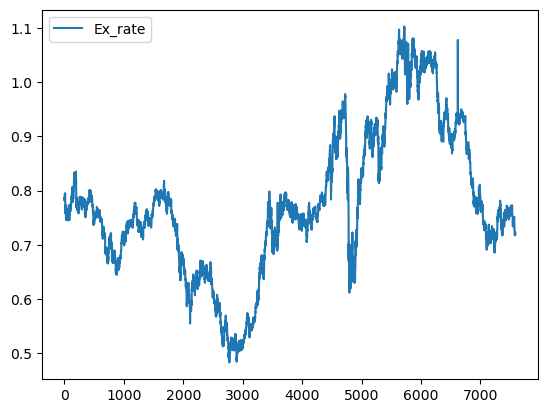

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# line plot
df.info()
df.plot()

array([[<Axes: title={'center': 'Ex_rate'}>]], dtype=object)

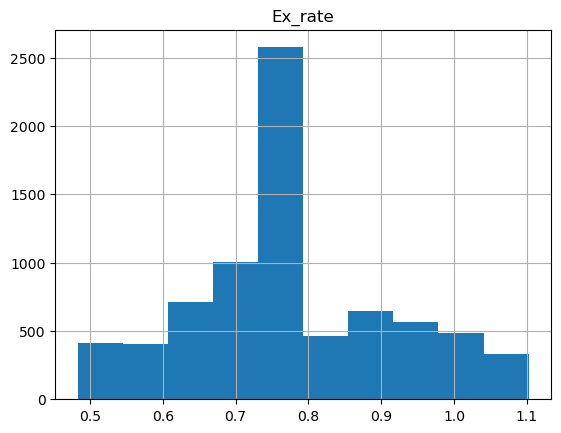

In [8]:
#### Histogram and Density Plots
# create a histogram plot
df.hist()



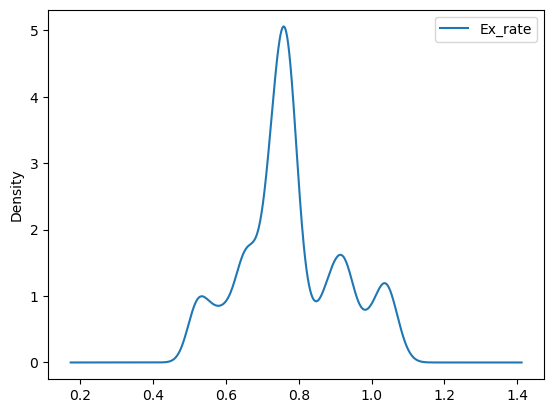

In [9]:

# create a density plot
from matplotlib import pyplot
df.plot(kind='kde')
pyplot.show()


In [10]:

df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [12]:
# Extract the year from the 'Date' column
df['Year'] = pd.to_datetime(df['date']).dt.year


In [13]:
df["Year"]

0       1990
1       1990
2       1990
3       1990
4       1990
        ... 
7583    2010
7584    2010
7585    2010
7586    2010
7587    2010
Name: Year, Length: 7588, dtype: int64

In [14]:
df["Year"].value_counts()

2000    366
1992    366
2008    366
1996    366
2004    366
2002    365
2009    365
2007    365
2006    365
2005    365
2003    365
1990    365
2001    365
1991    365
1999    365
1998    365
1997    365
1995    365
1994    365
1993    365
2010    283
Name: Year, dtype: int64

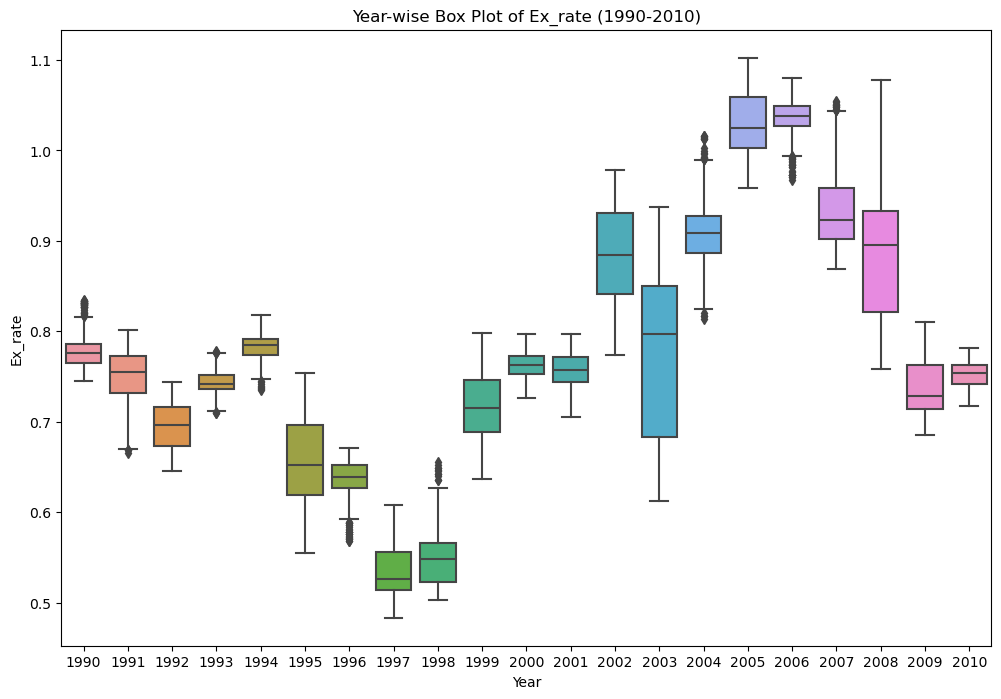

In [18]:
# Create a box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Ex_rate', data=df)
plt.xlabel('Year')
plt.ylabel('Ex_rate')
plt.title('Year-wise Box Plot of Ex_rate (1990-2010)')
plt.show()


#==========================================================================

In [19]:
#==========================================================================
# Extract the month from the 'Date' column
df['Month'] = pd.to_datetime(df['date']).dt.month


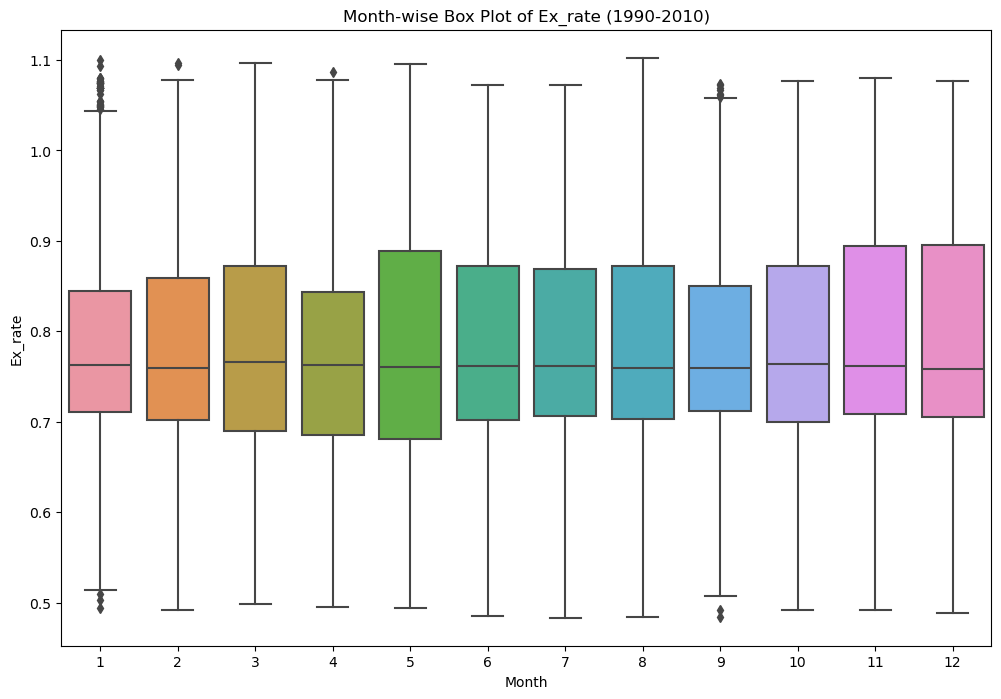

In [20]:

# Create a box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='Ex_rate', data=df)
plt.xlabel('Month')
plt.ylabel('Ex_rate')
plt.title('Month-wise Box Plot of Ex_rate (1990-2010)')
plt.show()


In [ ]:
: Handle any missing values or anomalies identified during the exploration phase

In [ ]:
#there are no missing values hence there is no need to handle them...

In [31]:
#Part 2: Model Building - ARIMA
#1.Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) 

#for the ARIMA model for one or more currency time series.
                   
#2.Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
                   
#3.Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
                   
#4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [32]:
#importing necessary libraries and packages


In [33]:

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats


In [27]:
# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


<Figure size 4000x1000 with 0 Axes>

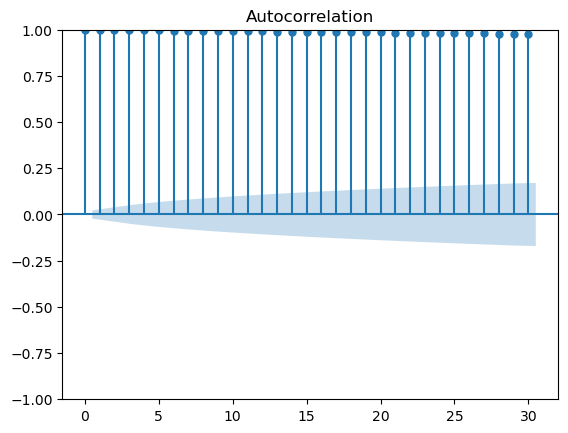

In [29]:


#==========================================================================
# create an autocorrelation plot
from matplotlib import pyplot
pyplot.figure(figsize = (40,10))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Ex_rate"],lags=30)
pyplot.show()



<Figure size 4000x1000 with 0 Axes>

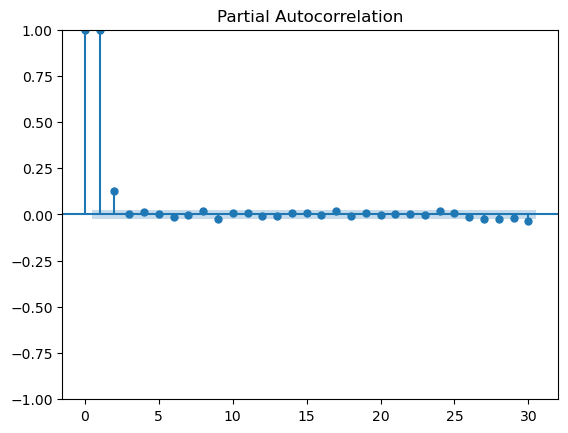

In [34]:


#==========================================================================
# create an partial autocorrelation plot
from matplotlib import pyplot
pyplot.figure(figsize = (40,10))
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Ex_rate"],lags=30)
pyplot.show()



In [118]:
#ACF Plot:

#Shows spikes at various lags, indicating significant autocorrelation.

#PACF Plot:
#Shows significant spikes at certain lags, helping identify the autoregressive (AR) terms.

In [35]:
##FITTING THE ARIMA MODEL

In [37]:
# Load your data
exchange_rate_data = pd.read_csv('exchange_rate.csv', index_col='date', parse_dates=True)
series = exchange_rate_data['Ex_rate']

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(series, order=(2, 0, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 0, 0)   Log Likelihood               28056.609
Date:                Thu, 25 Jul 2024   AIC                         -56105.218
Time:                        21:42:42   BIC                         -56077.481
Sample:                             0   HQIC                        -56095.699
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.088      8.850      0.000       0.605       0.949
ar.L1          0.8682      0.002    397.265      0.000       0.864       0.872
ar.L2          0.1310      0.002     55.929      0.0

In [119]:
#3.Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

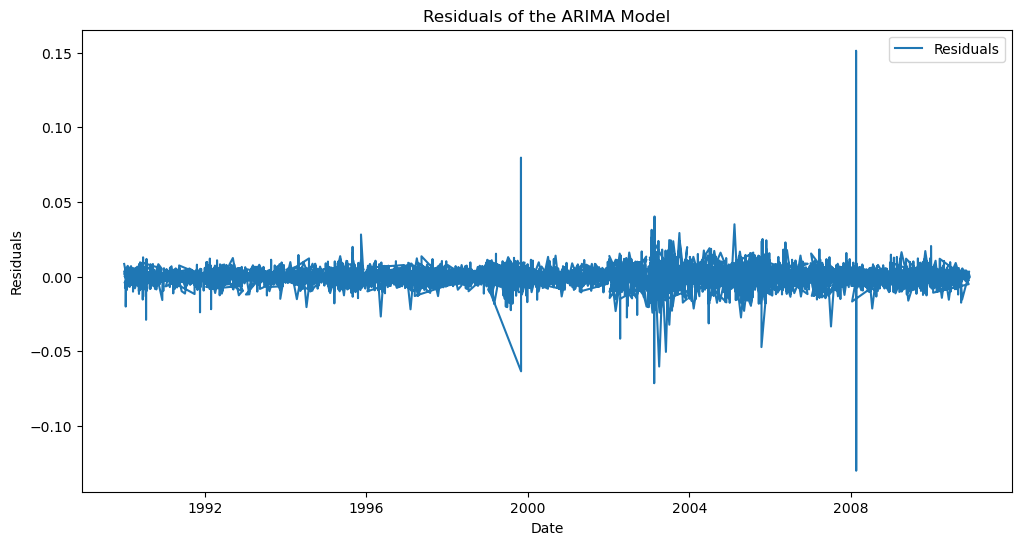

In [39]:
# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of the ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


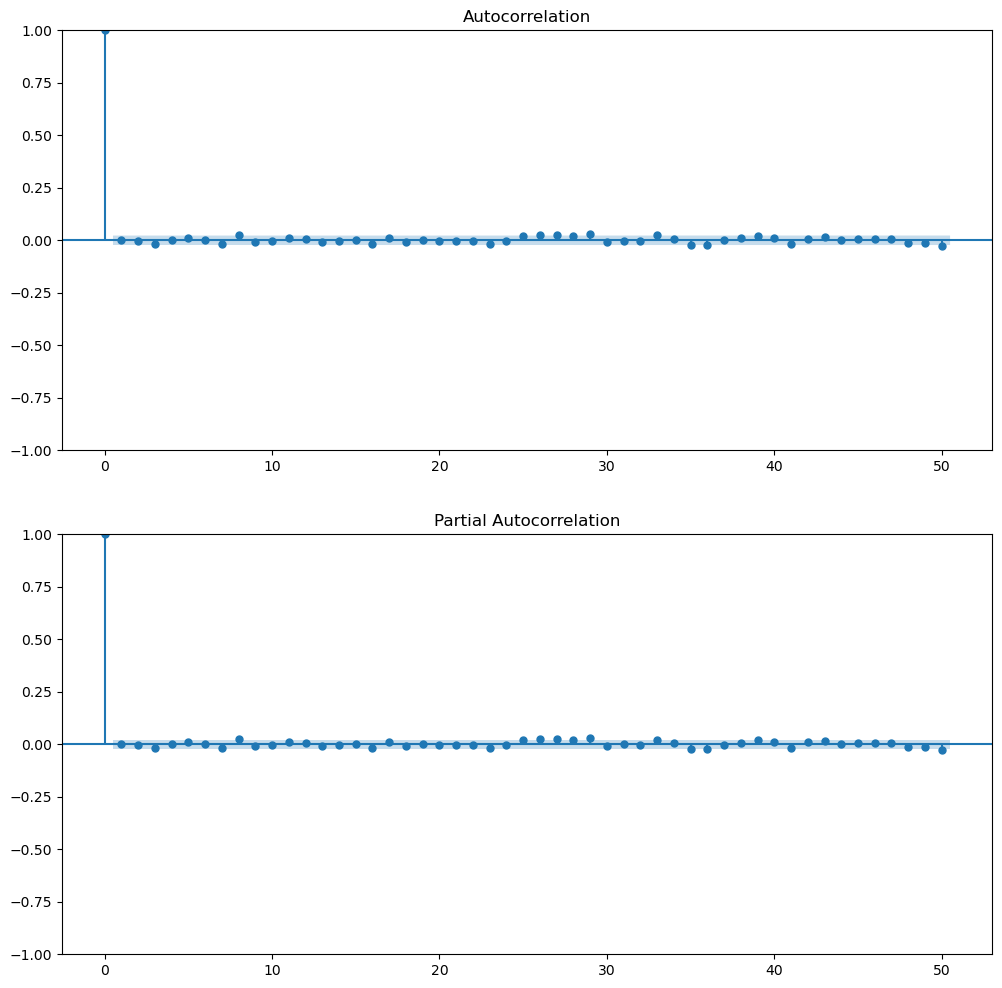

In [40]:
# Plot ACF and PACF for the residuals
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

plot_acf(residuals, ax=ax[0], lags=50)
plot_pacf(residuals, ax=ax[1], lags=50)

plt.show()


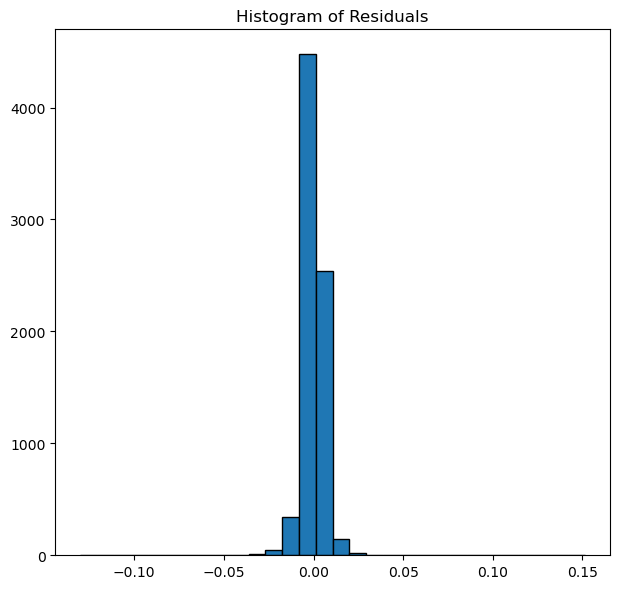

In [44]:
# Histogram and Q-Q plot of residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()


In [42]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(lb_test)


     lb_stat  lb_pvalue
10  11.20309   0.341916


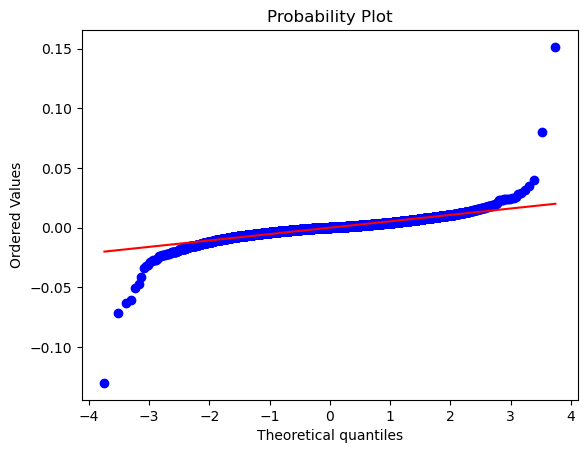

In [49]:

fig, ax = plt.subplots()
stats.probplot(residuals, dist="norm", plot=ax)
plt.show()


In [120]:
#Interpretation


#Residuals Plot:

#The residuals should appear as white noise, with no obvious patterns or trends.

#ACF of Residuals:

#There should be no significant autocorrelation; all spikes should be within the confidence intervals.
    
#Ljung-Box Test: A non-significant p-value indicates that there is no significant autocorrelation in the residuals.
    
#Normality of Residuals: 
 #   The histogram should resemble a normal distribution, and the Q-Q plot should show the points lying on the reference line.

In [121]:
#4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [50]:
# Define the split point
split_point = int(len(exchange_rate_data) * 0.8)
train_data = exchange_rate_data.iloc[:split_point]
test_data = exchange_rate_data.iloc[split_point:]


In [64]:
import pandas as pd

# Load the data
exchange_rate_data = pd.read_csv('exchange_rate.csv')

# Convert the date column to datetime format and set it as the index
exchange_rate_data['date'] = pd.to_datetime(exchange_rate_data['date'], format='%d-%m-%Y %H:%M')
exchange_rate_data.set_index('date', inplace=True)


In [66]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and test sets
split_point = int(len(exchange_rate_data) * 0.8)
train_data = exchange_rate_data.iloc[:split_point]
test_data = exchange_rate_data.iloc[split_point:]

# Fit the ARIMA model on the training data
model = ARIMA(train_data, order=(2,0,0))  # Replace (1, 1, 1) with appropriate values
model_fit = model.fit()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [67]:
# Forecast the test data period
forecast_steps = len(test_data)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = test_data.index
forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=['Forecast'])


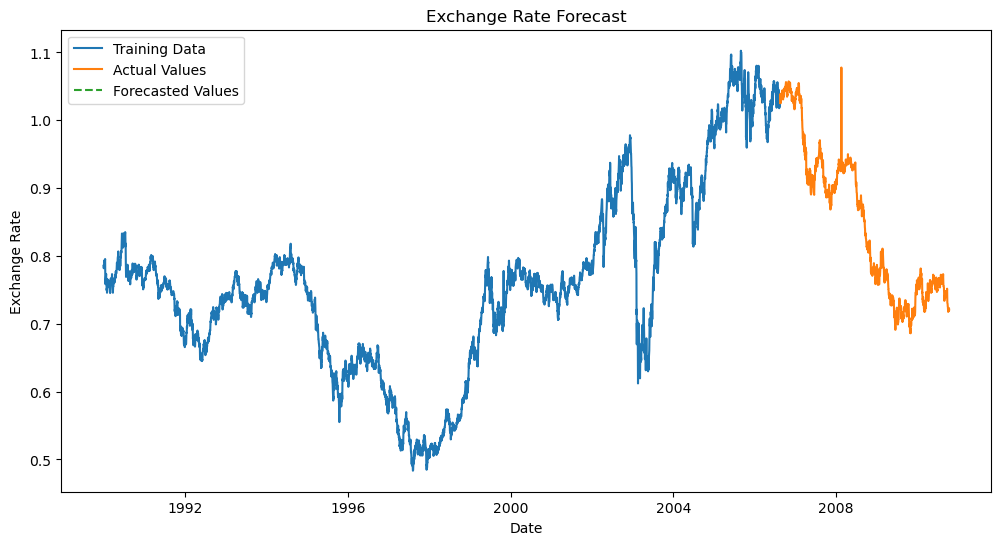

In [68]:
import matplotlib.pyplot as plt

# Plot the actual values and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Values')
plt.plot(forecast_df, label='Forecasted Values', linestyle='--')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [122]:
#Part 3: Model Building - Exponential Smoothing

#1.Model Selection:

#Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
#
#2.Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

##3.Model Fitting and Forecasting: 
##Fit the chosen Exponential Smoothing model and forecast future values. 

##    Compare these forecasts visually with the actual data.

In [123]:
#Step 1: Visualize the Time Series Data
#
#Step 2: Choose the Model Based on Data Characteristics

#No trend or seasonality: Use Simple Exponential Smoothing.

    
#Trend but no seasonality: Use Holt’s Linear Trend Model.
#Trend and seasonality: Use Holt-Winters Seasonal Model.
#Step 3: Fit the Selected Model
#We'll fit the appropriate model based on the observations from the plot.

#Step 4: Forecast and Visualize
##
#Step 1: Visualize the Time Series Data

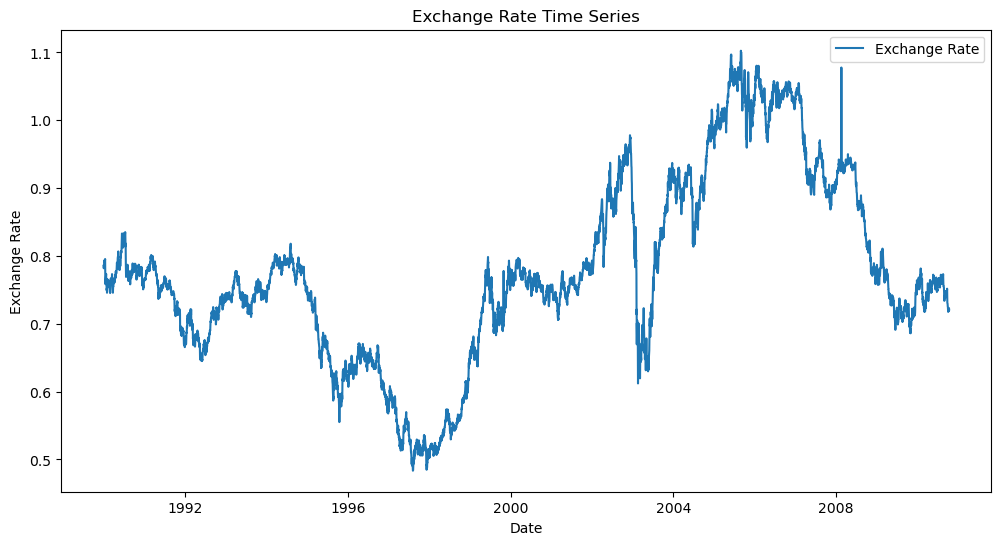

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
exchange_rate_data = pd.read_csv('exchange_rate.csv')

# Convert the date column to datetime format and set it as the index
exchange_rate_data['date'] = pd.to_datetime(exchange_rate_data['date'], format='%d-%m-%Y %H:%M')
exchange_rate_data.set_index('date', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(exchange_rate_data, label='Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [70]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the Simple Exponential Smoothing model
model = SimpleExpSmoothing(train_data['Ex_rate'])
model_fit = model.fit()

# Forecast the test data period
forecast = model_fit.forecast(steps=len(test_data))


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


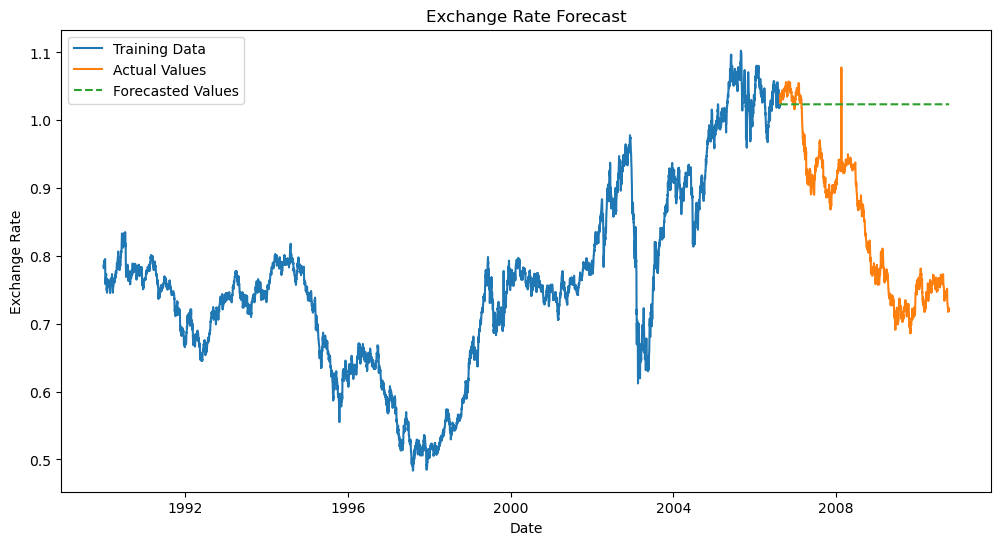

In [71]:
# Convert the forecast to a dataframe for easy plotting
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=['Forecast'])

# Plot the actual values and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Values')
plt.plot(forecast_df, label='Forecasted Values', linestyle='--')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [ ]:
##Holt-Winters Seasonal Model

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


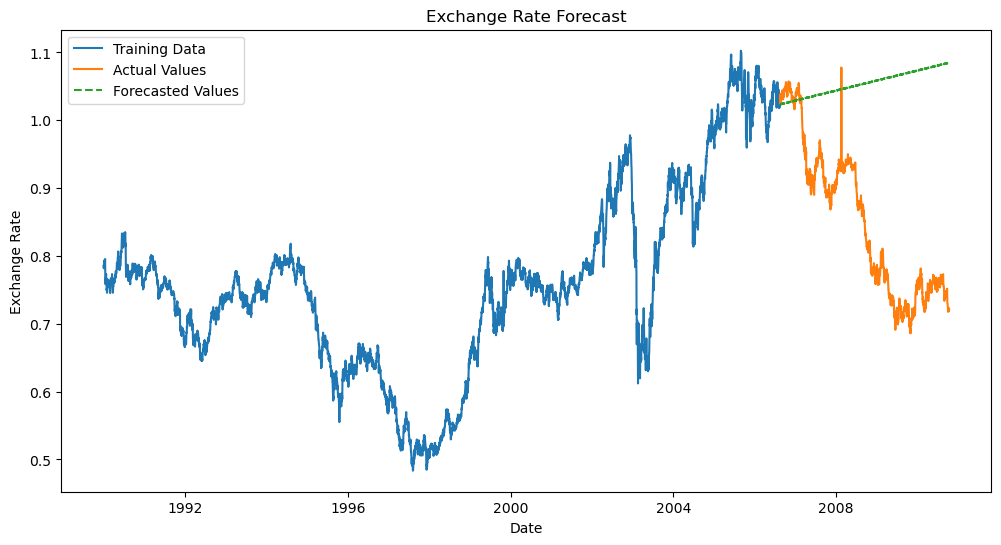

In [72]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Load the data
exchange_rate_data = pd.read_csv('exchange_rate.csv')

# Convert the date column to datetime format and set it as the index
exchange_rate_data['date'] = pd.to_datetime(exchange_rate_data['date'], format='%d-%m-%Y %H:%M')
exchange_rate_data.set_index('date', inplace=True)

# Split the data into training and test sets
split_point = int(len(exchange_rate_data) * 0.8)
train_data = exchange_rate_data.iloc[:split_point]
test_data = exchange_rate_data.iloc[split_point:]

# Fit the Holt-Winters Seasonal model
model = ExponentialSmoothing(train_data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast the test data period
forecast = model_fit.forecast(steps=len(test_data))

# Convert the forecast to a dataframe for easy plotting
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=['Forecast'])

# Plot the actual values and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Values')
plt.plot(forecast_df, label='Forecasted Values', linestyle='--')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [124]:
# Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

In [125]:


# Define the grid search space
param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'seasonal_periods': [12, 24],
    'smoothing_level': [0.1, 0.2, 0.5, 0.8, 0.9],
    'smoothing_slope': [0.1, 0.2, 0.5, 0.8, 0.9],
    'smoothing_seasonal': [0.1, 0.2, 0.5, 0.8, 0.9]
}



In [77]:
#Exponential Smoothing Parameter Optimization Using Grid Search
import pandas as pd
import itertools
import warnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
file_path = 'exchange_rate.csv'
exchange_rate_data = pd.read_csv(file_path, index_col='date', parse_dates=True)
series = exchange_rate_data['Ex_rate']

# Define the parameter grid
trend = ['add', 'mul', None]
seasonal = ['add', 'mul', None]
seasonal_periods = [12]

# Generate all different combinations of trend and seasonal components
param_grid = list(itertools.product(trend, seasonal, seasonal_periods))

# Find the best Exponential Smoothing model based on AIC
warnings.filterwarnings("ignore")
best_aic = float("inf")
best_params = None
best_model = None

for trend, seasonal, seasonal_periods in param_grid:
    try:
        model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = (trend, seasonal, seasonal_periods)
            best_model = results
    except:
        continue

print(f'Best Exponential Smoothing model: Trend:{best_params[0]}, Seasonal:{best_params[1]}, Seasonal Periods:{best_params[2]} - AIC:{best_aic}')

Best Exponential Smoothing model: Trend:None, Seasonal:None, Seasonal Periods:12 - AIC:-77644.98075015451


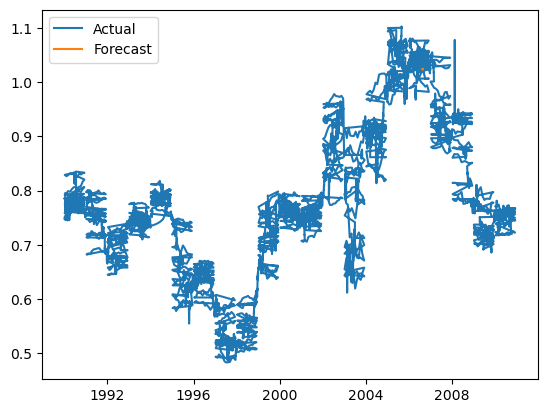

In [78]:
forecast = model_fit.forecast(steps=10)
plt.figure()
plt.plot(series, label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [127]:
#Part 4: Evaluation and Comparison
#1.Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

#2.Model Comparison:

#Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

#3.Conclusion:

#Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

In [91]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(2,0,0))
model_fit = model.fit()


In [92]:
forecast = model_fit.forecast(steps=forecast_steps)


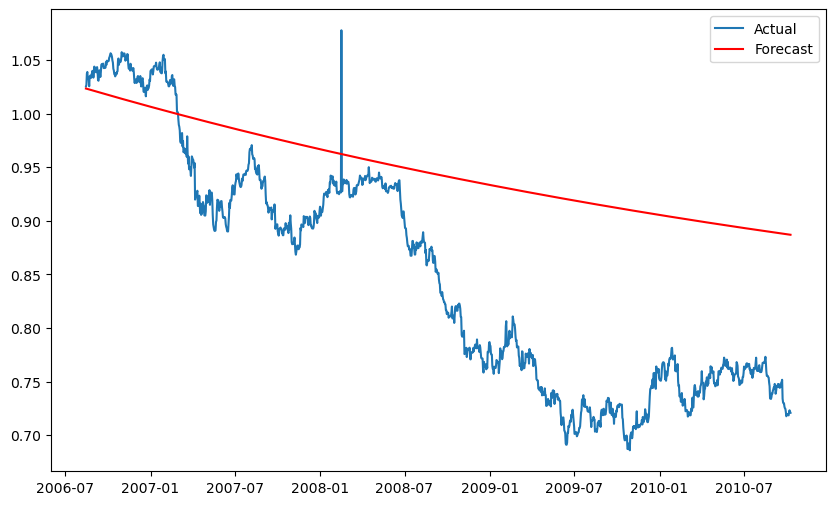

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()


In [126]:
#1.Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data, forecast)
rmse = mean_squared_error(test_data, forecast, squared=False)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100


In [98]:
print(mae)

0.1042874738589884


In [100]:

print(rmse)

0.122412476243243


In [102]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()


In [103]:
forecast = model_fit.forecast(steps=forecast_steps)


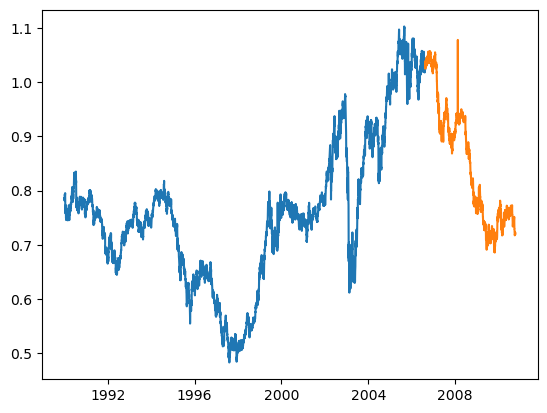

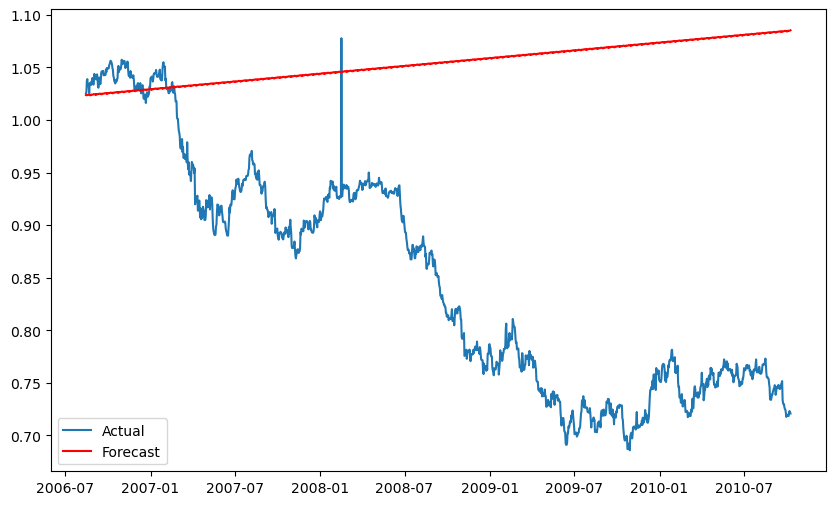

In [106]:
#plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Values')
#plt.plot(forecast_df, label='Forecasted Values', linestyle='--')

plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()


In [111]:
mae = mean_absolute_error(test_data, forecast)
rmse = mean_squared_error(test_data, forecast, squared=False)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
print(mae)
print(rmse)

0.20748607799653648
0.2401410210486012


In [116]:
#visualizations...

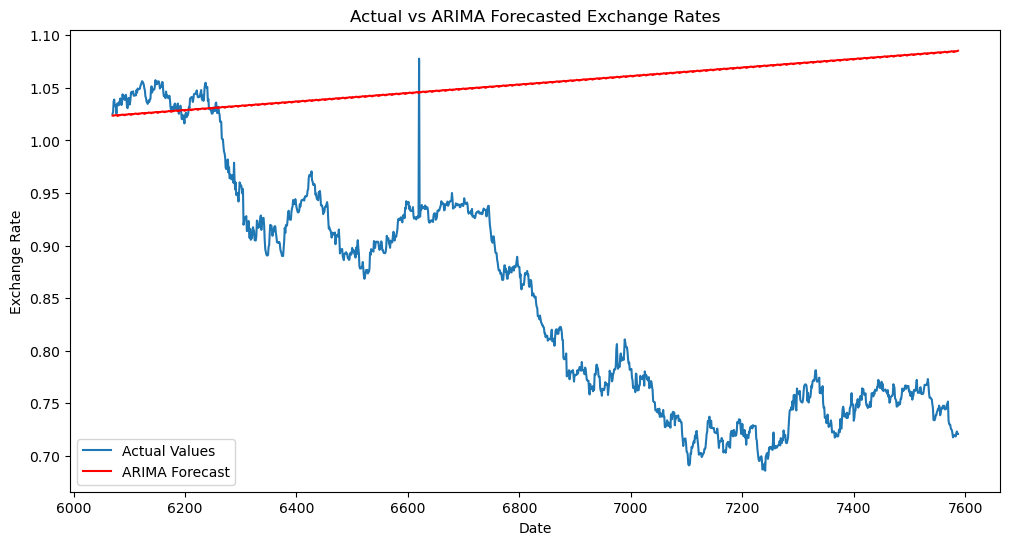

In [115]:

import matplotlib.pyplot as plt

# Visualize the forecasted values against the actual values for ARIMA
plt.figure(figsize=(12, 6))
plt.plot(test.index, test_data, label='Actual Values')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
plt.title('Actual vs ARIMA Forecasted Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


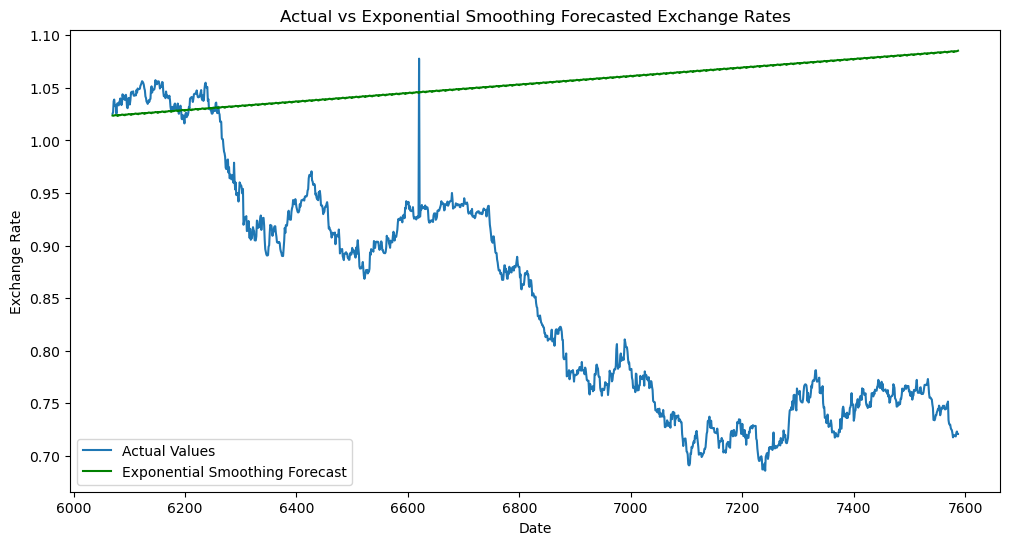

In [114]:

# Visualize the forecasted values against the actual values for Exponential Smoothing
plt.figure(figsize=(12, 6))
plt.plot(test.index, test_data, label='Actual Values')
plt.plot(test.index, forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Actual vs Exponential Smoothing Forecasted Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()